<a href="https://colab.research.google.com/github/luanakwon/GroundTemperature/blob/main/GroundTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [35]:
cols = ["YearMonthDayHourMinute","STN","Lon","Lat","isitu-LST","Band1","Band2","Band3","Band4","Band5","Band6","Band7","Band8","Band9","Band10","Band11","Band12","Band13","Band14","Band15","Band16","30daysBand3","30daysBand13","GK2A-LST","SolarZA","SateZA","ESR","Height","LandType","insitu-TA","insitu-HM","insitu-TD","insitu-TG","insitu-TED0.05","insitu-TED0.1","insitu-TED0.2","insitu-TED0.3","insitu-TED0.5","insitu-TED1.0","insitu-TED1.5","insitu-TED3.0","insitu-TED5.0","insitu-PA","insitu-PS"]
features = ["Lon","Lat",
           "Band1","Band2","Band3","Band4",
           "Band5","Band6","Band7","Band8",
           "Band9","Band10","Band11","Band12",
           "Band13","Band14","Band15","Band16",
           "30daysBand3","30daysBand13",
           "GK2A-LST","SolarZA","SateZA",
           "ESR",
           "LandType"]
targets = ["isitu-LST","insitu-TA"]

# Data Overview

In [ ]:
sample = pd.read_csv('20200101.LST.csv',header=0,names=cols)
sample.head()

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,insitu-TED0.1,insitu-TED0.2,insitu-TED0.3,insitu-TED0.5,insitu-TED1.0,insitu-TED1.5,insitu-TED3.0,insitu-TED5.0,insitu-PA,insitu-PS
0,202001010000,92,128.66670,38.06670,-999.0,-0.00057,0.00000,0.0003,-0.00030,0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,202001010000,93,127.75443,37.94738,-999.0,0.00000,0.00000,0.0003,0.00075,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.0003,-0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1014.1,1034.6
3,202001010000,96,131.86983,37.23952,-999.0,0.00000,0.00000,0.0000,0.00105,0.0000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.0003,0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1019.6,1034.8


(104543, 44)
0.0 7.239350000000002
0.0 5.420450000000002


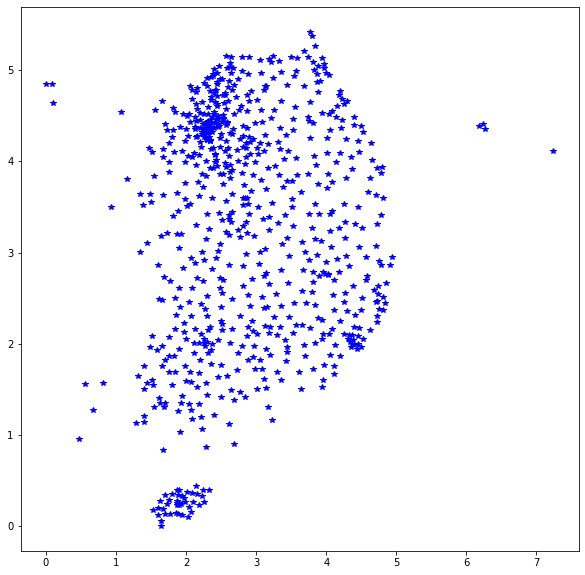

In [ ]:
print(sample.shape)
df = sample.iloc[:,1:4].drop_duplicates().to_numpy()
df[:,1:] -= [124.63048,33.12206]
print(min(df[:,1]),max(df[:,1]))
print(min(df[:,2]),max(df[:,2]))
plt.figure(figsize=(10,10))
plt.plot(df[:,1],df[:,2],'b*')
plt.show()

In [ ]:
for i in range(4,44):
  col = sample.loc[sample.iloc[:,i] > -999].iloc[:,i]
  if i == 28:
    print(f"{cols[i]} \t\tmin: {np.min(col)} \t\t\tmax: {np.max(col)} \t\t\tavg: {np.mean(col)} ")
  elif len(cols[i]) > 6:
    print(f"{cols[i]} \t\tmin: {np.min(col)} \t\tmax: {np.max(col)} \t\tavg: {np.mean(col)} ")
  else:
    print(f"{cols[i]} \t\t\tmin: {np.min(col)} \t\tmax: {np.max(col)} \t\tavg: {np.mean(col)} ")

isitu-LST 		min: -4.9 		max: 26.2 		avg: 0.27080945558739256 
Band1 			min: -0.00113 		max: 0.47359 		avg: 0.05738944055405184 
Band2 			min: -0.00114 		max: 0.48815 		avg: 0.054203694192665935 
Band3 			min: -0.00328 		max: 0.50395 		avg: 0.0484779530327403 
Band4 			min: -0.00254 		max: 0.5813 		avg: 0.059793412735871763 
Band5 			min: -0.00151 		max: 0.08579 		avg: 0.0038715424256143016 
Band6 			min: -0.00129 		max: 0.42633 		avg: 0.05491612221505149 
Band7 			min: 238.19384 		max: 308.08012 		avg: 271.8489144462853 
Band8 			min: 228.0943 		max: 245.40486 		avg: 238.82654382596303 
Band9 			min: 230.42801 		max: 254.45996 		avg: 248.05423254235814 
Band10 			min: 231.328 		max: 262.12081 		avg: 253.84858025438996 
Band11 			min: 233.6343 		max: 285.24053 		avg: 265.11799543090245 
Band12 			min: 229.78848 		max: 262.39371 		avg: 247.0980390755849 
Band13 			min: 234.30622 		max: 287.81421 		avg: 266.98636089782985 
Band14 			min: 233.11319 		max: 288.20345 		avg: 266.9280302948457

In [ ]:
df_LST = sample.loc[(sample['isitu-LST'] > -999)]
print(f"df size from {sample.shape} -> {df_LST.shape}")
df_TA = sample.loc[(sample['insitu-TA'] > -999)]
print(f"df size from {sample.shape} -> {df_TA.shape}")
df_LST_TA = sample.loc[(sample['isitu-LST'] > -999) | (sample['insitu-TA'] > -999)]
print(f"df size from {sample.shape} -> {df_LST_TA.shape}")

df size from (104543, 44) -> (13960, 44)
df size from (104543, 44) -> (13960, 44)
df size from (104543, 44) -> (13960, 44)


# Drop unlabeled data

In [ ]:
%%bash
STARTYEAR=2020
ENDYEAR=2021
for (( c=$STARTYEAR; c<=$ENDYEAR; c++ ))
do
  STARTMONTH=1
  ENDMONTH=12
  for (( d=$STARTMONTH; d<=$ENDMONTH; d++ ))
  do
    wget "https://bd.kma.go.kr/contest/resources/$c$(printf '%02d' $d).zip"
    unzip "/content/$c$(printf '%02d' $d).zip" -d "/content/data"
  done
done

In [ ]:
!wget "https://bd.kma.go.kr/contest/resources/202003.zip"
!unzip "/content/202003.zip" -d "/content/data"

--2022-06-20 15:22:19--  https://bd.kma.go.kr/contest/resources/202003.zip
Resolving bd.kma.go.kr (bd.kma.go.kr)... 203.247.90.20
Connecting to bd.kma.go.kr (bd.kma.go.kr)|203.247.90.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297718748 (284M) [application/zip]
Saving to: ‘202003.zip’

202003.zip          100%[===================>] 283.93M  14.9MB/s    in 25s     

2022-06-20 15:22:45 (11.2 MB/s) - ‘202003.zip’ saved [297718748/297718748]

Archive:  /content/202003.zip
  inflating: /content/data/20200301.LST.csv  
  inflating: /content/data/20200302.LST.csv  
  inflating: /content/data/20200303.LST.csv  
  inflating: /content/data/20200304.LST.csv  
  inflating: /content/data/20200305.LST.csv  
  inflating: /content/data/20200306.LST.csv  
  inflating: /content/data/20200307.LST.csv  
  inflating: /content/data/20200308.LST.csv  
  inflating: /content/data/20200309.LST.csv  
  inflating: /content/data/20200310.LST.csv  
  inflating: /content/data/202003

In [ ]:
folderpath='data/'

for year in [2020]:
  for month in range(3,4):
    allmon = []
    for i in range(1,32):
      try:
        df = pd.read_csv(folderpath + '%d%02d%02d.LST.csv'%(year,month,i),names=cols)
      except FileNotFoundError:
        print('%d%02d%02d.LST.csv missing'%(year,month,i))
        continue
      # exclude testset
      if year==2021 and ((month==7 and 1<=i and i<=11) or (month==8 and 21<=i and i<=31)):
        continue

      len0 = df.shape[0]
      df = df.loc[(df['isitu-LST'] > -999) | (df['insitu-TA'] > -999)]
      len1 = df.shape[0]
      print(f"dropped {len0-len1}, concatenating {len1} from",'%d%02d%02d.LST.csv'%(year,month,i))
      allmon.append(df)
      
    if len(allmon) != 0:
      df_all = pd.concat(allmon)
      print('='*10 + ' %d%02d done '%(year,month) + '='*10 + f'  {df_all.shape}')
      df_all.to_csv('%d%02d.LST.csv'%(year,month),header=False, index=False)

dropped 89141, concatenating 15403 from 20200301.LST.csv
dropped 89178, concatenating 15366 from 20200302.LST.csv
dropped 89147, concatenating 15397 from 20200303.LST.csv
dropped 89183, concatenating 15361 from 20200304.LST.csv
dropped 89139, concatenating 15405 from 20200305.LST.csv
dropped 89400, concatenating 15144 from 20200306.LST.csv
dropped 89154, concatenating 15390 from 20200307.LST.csv
dropped 89141, concatenating 15403 from 20200308.LST.csv
dropped 89154, concatenating 15390 from 20200309.LST.csv
dropped 89149, concatenating 15395 from 20200310.LST.csv
dropped 89150, concatenating 15394 from 20200311.LST.csv
dropped 89221, concatenating 15323 from 20200312.LST.csv
dropped 89191, concatenating 15353 from 20200313.LST.csv
dropped 89140, concatenating 15404 from 20200314.LST.csv
dropped 89139, concatenating 15405 from 20200315.LST.csv
dropped 89145, concatenating 15399 from 20200316.LST.csv
dropped 89154, concatenating 15390 from 20200317.LST.csv
dropped 89146, concatenating 15

In [ ]:
os.system("rm %d%02d??.LST.csv"%(year,month))

0

In [ ]:
!cp /content/202003.LST.csv /content/drive/MyDrive/Dataset/GroundTemp/.

# 3

In [36]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split

In [37]:
RANDOM_STATE = 31415
target = targets[:1] # isitu-LST

In [58]:
df = pd.read_csv('/content/train/202001.LST.csv',names=cols,usecols=features+target,nrows=10000)
df.head()

,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,Band6,Band7,...,Band14,Band15,Band16,30daysBand3,30daysBand13,GK2A-LST,SolarZA,SateZA,ESR,LandType
0,128.56473,38.25085,-2.6,0.00000,0.00000,-0.0006,-0.00030,-0.0003,-0.00000,283.16913,...,283.29086,281.10048,263.05706,0.0,279.63231,-999.00,162.63634,44.52481,-9.38141,2
1,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.0003,-0.00060,-0.0003,-0.00065,251.40114,...,257.36883,256.91597,250.07156,0.0,268.76471,-999.00,162.17793,44.41427,-9.36082,2
2,127.06070,37.90188,-3.1,0.00000,0.00000,0.0003,0.00060,-0.0003,-0.00065,251.92105,...,257.69321,257.16449,250.25549,0.0,269.28127,-999.00,162.27711,44.13104,-9.36664,2
3,126.76648,37.88589,-3.4,-0.00057,-0.00057,-0.0003,0.00015,0.0000,-0.00065,251.66283,...,258.01635,257.58363,250.45947,0.0,270.71421,-999.00,162.14729,44.12316,-9.36060,2
4,127.73570,37.90262,-3.6,-0.00057,0.00000,0.0003,0.00030,0.0000,-0.00065,262.00165,...,261.56559,260.91113,252.35744,0.0,270.63251,-9.38,162.57755,44.12761,-9.38050,3


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.loc[:,features],df.loc[:,target], test_size=0.2, train_size=0.8, 
    random_state=RANDOM_STATE, shuffle=True, stratify=None)
print(f"{X_train.shape[0]} train values, {X_test.shape[0]} test values out of {df.shape[0]} values")
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

8000 train values, 2000 test values out of 10000 values
(8000, 25)
(2000, 25)
(8000, 1)
(2000, 1)


In [60]:
RFR_model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=1.0, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=RANDOM_STATE, 
    verbose=1, 
    warm_start=False, 
    ccp_alpha=0.0, 
    max_samples=None
)

In [61]:
RFR_model.fit(X_train, Y_train.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.5s finished


RandomForestRegressor(max_features=1.0, random_state=31415, verbose=1)

In [62]:
print(RFR_model.score(X_test,Y_test.values.ravel()))

0.9544059610816131


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


(2000,)


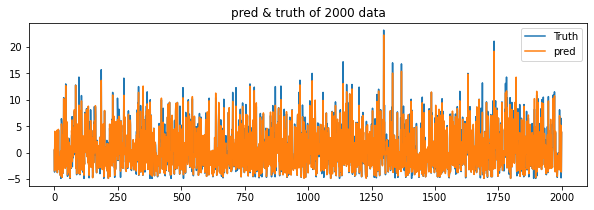

In [63]:
prediction = RFR_model.predict(X_test)
print(prediction.shape)
plt.figure(figsize=(10,3))
plt.title(f'pred & truth of {X_test.shape[0]} data')
plt.plot(Y_test.values.ravel(), label='Truth')
plt.plot(prediction,label='pred')
plt.legend()
plt.show()

# save dataset to drive

In [4]:
!cp /content/drive/MyDrive/Dataset/GroundTemp/* /content/train/.

In [8]:
!zip /content/train.zip /content/train/*

  adding: content/train/202001.LST.csv (deflated 69%)
  adding: content/train/202002.LST.csv (deflated 68%)
  adding: content/train/202003.LST.csv (deflated 68%)
  adding: content/train/202004.LST.csv (deflated 68%)
  adding: content/train/202005.LST.csv (deflated 67%)
  adding: content/train/202006.LST.csv (deflated 67%)
  adding: content/train/202007.LST.csv (deflated 67%)
  adding: content/train/202008.LST.csv (deflated 67%)
  adding: content/train/202009.LST.csv (deflated 68%)
  adding: content/train/202010.LST.csv (deflated 68%)
  adding: content/train/202011.LST.csv (deflated 68%)
  adding: content/train/202101.LST.csv (deflated 70%)
  adding: content/train/202102.LST.csv (deflated 69%)
  adding: content/train/202103.LST.csv (deflated 68%)
  adding: content/train/202104.LST.csv (deflated 68%)
  adding: content/train/202105.LST.csv (deflated 68%)
  adding: content/train/202106.LST.csv (deflated 67%)
  adding: content/train/202109.LST.csv (deflated 68%)
  adding: content/train/2021

In [9]:
!cp train.zip /content/drive/MyDrive/Dataset/GroundTemp/.